# ARCHAEA

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

### ALPHA & BETA DIVERSITY
1. make a MAFFT tree
2. alpha rarefaction
3. alpha diversity
4. beta diversity

In [18]:
#import packages
import os
import dokdo
import qiime2 as q2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from qiime2.plugins import phylogeny
from qiime2.plugins import diversity
from skbio import DistanceMatrix
import qiime2.plugins.phylogeny.actions as phylogeny_actions

In [3]:
# define workdir
%env WORKDIR /home/nezapa/qiime-thesis
WORKDIR = os.environ.get("WORKDIR")

env: WORKDIR=/home/nezapa/qiime-thesis


In [4]:
# import data
denoisetable_ar = q2.Artifact.load('./results/denoisetable_ar.qza')
rep_seqs_ar = q2.Artifact.load('./results/rep_seqs_ar.qza')
denoising_stats = q2.Artifact.load('./results/denoising_stats.qza')
sample_metadata = q2.Metadata.load('../00.sample-metadata.tsv')

## TREE

In [5]:
action_results = phylogeny_actions.align_to_tree_mafft_fasttree(
    sequences=rep_seqs_ar,
)
aligned_rep_seqs = action_results.alignment
masked_aligned_rep_seqs = action_results.masked_alignment
unrooted_tree = action_results.tree
rooted_tree = action_results.rooted_tree

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 1 /tmp/qiime2-archive-fqk6n4hp/7fefcce9-6b7e-43c5-b883-c847fac0f7d8/data/dna-sequences.fasta



inputfile = orig
10 x 260 - 260 d
nthread = 1
nthreadpair = 1
nthreadtb = 1
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 10 (thread    0)
done.

Constructing a UPGMA tree (efffree=0) ... 
    0 / 10
done.

Progressive alignment 1/2... 
STEP     2 / 9 (thread    0) f
Reallocating..done. *alloclen = 1521
STEP     9 / 9 (thread    0) f
done.

Making a distance matrix from msa.. 
    0 / 10 (thread    0)
done.

Constructing a UPGMA tree (efffree=1) ... 
    0 / 10
done.

Progressive alignment 2/2... 
STEP     4 / 9 (thread    0) f
Reallocating..done. *alloclen = 1521
STEP     9 / 9 (thread    0) f
done.

disttbfast (nuc) Version 7.505
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
1 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto i

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: FastTree -quote -nt /tmp/qiime2-archive-vo6gco_v/dbdb575c-85a7-4311-a5ef-c88c12dab71c/data/aligned-dna-sequences.fasta



FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: /tmp/qiime2-archive-vo6gco_v/dbdb575c-85a7-4311-a5ef-c88c12dab71c/data/aligned-dna-sequences.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
Initial topology in 0.00 seconds
Refining topology: 13 rounds ME-NNIs, 2 rounds ME-SPRs, 7 rounds ML-NNIs
Total branch-length 0.963 after 0.01 sec
ML-NNI round 1: LogLk = -1244.066 NNIs 2 max delta 0.25 Time 0.02
Switched to using 20 rate categories (CAT approximation)
Rate categories were divided by 0.756 so that average rate = 1.0
CAT-based log-likelihoods may not be comparable across runs
Use -gamma for approximate but comparable Gamma(20) log-likelihoods
ML-NNI round 2: LogLk = -1157.006 NNIs 0 max delta 0.00 Time 0.03
Turning off heuristics for final round of ML NNIs (converged

## ALPHA AND BETA DIVERSITY

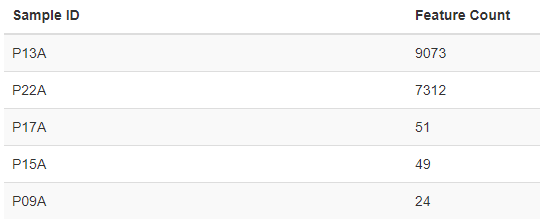

In [7]:
# # choose a round number in the 3rd quartile frequency per sample from the feature table visual summary
# # this step can take some time
# alpha_rarefaction_all = diversity.actions.alpha_rarefaction(
#     table = denoisetable_ar,
#     max_depth = 7000,
#     phylogeny = rooted_tree,
#     metrics = {'observed_features'},
#     metadata = sample_metadata,
#     steps = 100
# )

In [8]:
# save alpha_rarefacion
# alpha_rarefaction_all.visualization.save('./results/alpha_rarefaction_7000.qzv')
qzv_file_alpha = q2.Visualization.load('./results/alpha_rarefaction_7000.qzv')

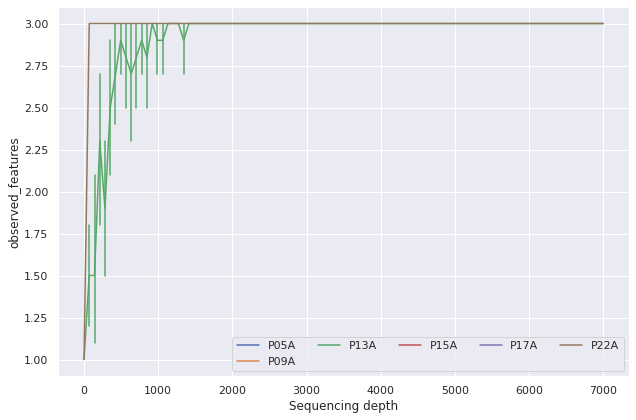

In [9]:
sns.set()
ax = dokdo.alpha_rarefaction_plot(qzv_file_alpha,
                                  figsize=(9, 6),
                                  metric='observed_features')
ax.legend(ncol=5)
plt.tight_layout()
plt.savefig('./results/ar_alpha_rarefaction_plot.png')

In [10]:
q2.Visualization.load('./results/alpha_rarefaction_7000.qzv')

<visualization: Visualization uuid: b88c4c2a-13b5-4364-b7ff-7b61a830387a>

### ALPHA DIVERSITY

In [11]:
# set sampling_depth based on alpha rarefacation curve
depth = 1500
action_results = diversity.actions.core_metrics_phylogenetic(
    table = denoisetable_ar,
    phylogeny = rooted_tree,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-a3nw45oq/1f59d990-0e82-4f5a-8669-a4c78782cfac/data/feature-table.biom -t /tmp/qiime2-archive-_zfwdh2l/4ba43558-310c-40db-b54f-37be5a04b09b/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-vbokxk3z

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-a3nw45oq/1f59d990-0e82-4f5a-8669-a4c78782cfac/data/feature-table.biom -t /tmp/qiime2-archive-_zfwdh2l/4ba43558-310c-40db-b54f-37be5a04b09b/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-7hhjdkqx

Running external command line application. This may print messages to stdout and/

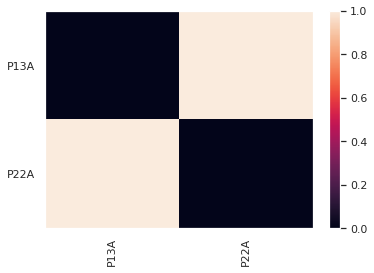

In [12]:
action_results.bray_curtis_distance_matrix.view(view_type=DistanceMatrix)

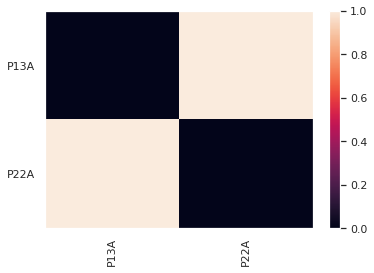

In [13]:
action_results.jaccard_distance_matrix.view(view_type=DistanceMatrix)

In [14]:
action_results.jaccard_emperor

<visualization: Visualization uuid: 3a73badf-cbf5-47ac-8228-3b923e0e9bbd>

In [15]:
alpha_rarefaction = diversity.visualizers.alpha_rarefaction(
    table = denoisetable_ar,
    phylogeny = rooted_tree,
    max_depth = depth,
    metadata = sample_metadata,
    metrics = {'chao1', 'shannon', 'simpson', 'simpson_e', 'observed_features', 'fisher_alpha'},
    steps =  100
)

In [16]:
alpha_rarefaction.visualization

<visualization: Visualization uuid: 44843dd7-8558-47ef-a0f6-2ee204a09e94>

In [20]:
metrics = ['observed_features', 'fisher_alpha', 'chao1', 'shannon', 'simpson']

# alpha diversity metrics and significance

# init empty list
df_list = []
artifacts = {}

# loop over metrics
for metric in metrics:
    result = diversity.actions.alpha(
        table = action_results.rarefied_table,
        metric = metric
    )  # save to result
    artifact = result.alpha_diversity  # extract artifact
    artifacts[metric] = artifact
    df_list.append(artifact.view(view_type=q2.Metadata).to_dataframe())  # convert to DF and add to list
    
df = pd.concat(df_list, axis=1)  # merge list of dataframes, add each DF as new column (instead of new row (default))
df

,observed_features,fisher_alpha,chao1,shannon_entropy,simpson
Sample ID,,,,,
P13A,3.0,0.359913,3.0,0.069833,0.014586
P22A,3.0,0.359913,3.0,1.450576,0.601812


### BETA DIVERSITY

not enough specimen with archaea